In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

from openpathsampling.analysis.tis_analysis import TISTransition

storage = paths.storage.Storage("toy_tis.nc", mode="r")
print len(storage.sample)

5006


In [2]:
print len(storage.sampleset)
print len(storage.sample)

5001
5006


In [3]:
ensembles=storage.ensemble[:]

In [4]:
ensembles

In [5]:
stateA = ensembles[1].ensembles[2].ensemble.volume.volume1
stateB = ensembles[1].ensembles[2].ensemble.volume.volume2
interfaces = [e.ensembles[1].ensemble2.volume for e in ensembles[:]]
op = ensembles[1].ensembles[0].ensemble.volume.orderparameter

In [6]:
lmax = [e.ensembles[1].ensemble2.volume.lambda_max for e in ensembles[:]]
print lmax

[-0.3, -0.25, -0.2, -0.13, -0.05, 0.0]


In [7]:
tis = TISTransition(stateA=stateA, stateB=stateB, orderparameter=op, interfaces=interfaces, name="A->B", storage=storage)

AttributeError: 'NoneType' object has no attribute 'max_length_stopper'

In [8]:
storage.transition.load(0)

TypeError: __init__() takes at least 6 arguments (6 given)

AttributeError: 'NoneType' object has no attribute 'ensembles'

In [28]:
tis.ensembles = ensembles
for ensemble in tis.ensembles:
    ensemble.name = "I'face "+str(tis.ensembles.index(ensemble))

In [29]:
tis.ensemble_histogram_info['pathlength'].hist_args = { 'bin_width' : 5, 'bin_range' : (0, 100) }
tis.ensemble_histogram_info['max_lambda'].hist_args = { 'bin_width' : 0.02, 'bin_range' : (-0.35, 0.35) }

In [30]:
%%time
tis.all_statistics(samples=storage.sample, weights=None, force=True)

CPU times: user 2min 28s, sys: 4.16 s, total: 2min 32s
Wall time: 2min 34s


In [31]:
tis.histograms

{'max_lambda': {<openpathsampling.ensemble.SequentialEnsemble at 0x10fc5f990>: <openpathsampling.analysis.histogram.Histogram at 0x11837e0d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1180b5c50>: <openpathsampling.analysis.histogram.Histogram at 0x1200db9d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1180b5dd0>: <openpathsampling.analysis.histogram.Histogram at 0x11c62cf90>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1181d7f10>: <openpathsampling.analysis.histogram.Histogram at 0x1223cfa10>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1181fa250>: <openpathsampling.analysis.histogram.Histogram at 0x11abf39d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1181ff150>: <openpathsampling.analysis.histogram.Histogram at 0x11e782810>},
 'pathlength': {<openpathsampling.ensemble.SequentialEnsemble at 0x10fc5f990>: <openpathsampling.analysis.histogram.Histogram at 0x11abf3950>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1180b5c50>: <op

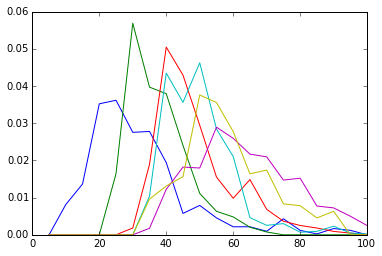

In [13]:
for ens in tis.ensembles:
    myhist = tis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.normalized())

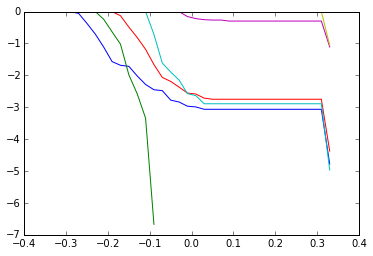

In [14]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), np.log(myhist.reverse_cumulative()))

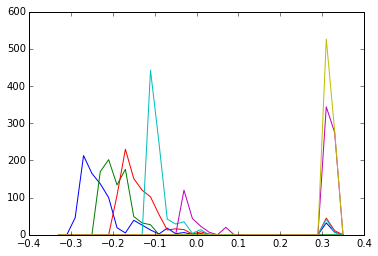

In [15]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist())

In [16]:
import openpathsampling.toy_dynamics as toys
pes = (toys.toy_pes.OuterWalls([1.0, 1.0], [0.0, 0.0]) + 
       toys.toy_pes.Gaussian(2.0, [1.0, 4.0], [0.0,1.0]) + 
       toys.toy_pes.Gaussian(2.0, [25.0, 1.0], [0.0, -1.0])
      )
from toy_plot_helpers import ToyPlot
plot = ToyPlot()
plot.add_pes(pes)

In [37]:
ens0_traj = [s.trajectory for s in storage.sample if s.ensemble == tis.ensembles[0]]
plt.contour(plot.X, plot.Y, plot._pes, levels=np.arange(0.0, 1.5, 0.1), colors='k')
for mytraj in ens0_traj[slice(None,None,10)]:
    plt.plot(mytraj.coordinates()[:,0,0], mytraj.coordinates()[:,0,1])

In [38]:
from openpathsampling.analysis.histogram import histograms_to_pandas_dataframe
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values(), fcn="reverse_cumulative").sort(axis=1)
df

,max_lambda A->B I'face 0,max_lambda A->B I'face 1,max_lambda A->B I'face 2,max_lambda A->B I'face 3,max_lambda A->B I'face 4,max_lambda A->B I'face 5
-0.33,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.27,0.944910,1.000000,1.000000,1.000000,1.000000,1.000000
-0.25,0.689820,1.000000,1.000000,1.000000,1.000000,1.000000
-0.23,0.492216,1.000000,1.000000,1.000000,1.000000,1.000000
-0.21,0.328144,0.785082,1.000000,1.000000,1.000000,1.000000
-0.19,0.208383,0.529709,1.000000,1.000000,1.000000,1.000000
-0.17,0.185629,0.360303,0.878857,1.000000,1.000000,1.000000
-0.15,0.179641,0.137800,0.616000,1.000000,1.000000,1.000000


In [39]:
from openpathsampling.analysis.wham import WHAM
wham = WHAM(cutoff=0.05)
wham.load_from_dataframe(df)
wham.clean_leading_ones()
wham_hist = wham.wham_bam_histogram()

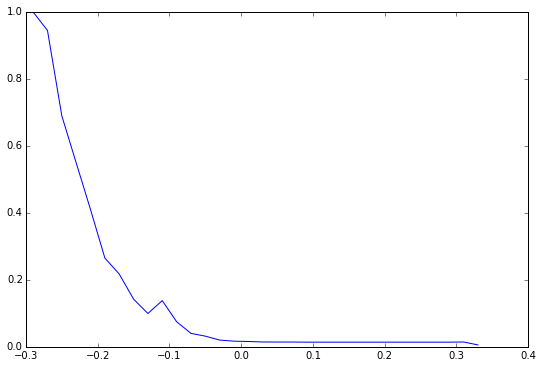

In [40]:
wham_hist_list = [ (k, wham_hist[k]) for k in sorted(wham_hist.keys()) ]
plt.plot(list(zip(*wham_hist_list)[0]), list(zip(*wham_hist_list)[1]))

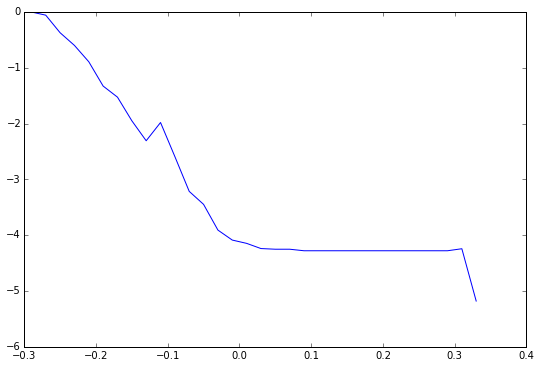

In [41]:
plt.plot(list(zip(*wham_hist_list)[0]), np.log(list(zip(*wham_hist_list)[1])))